<a href="https://colab.research.google.com/github/ajrotert/Machine-Learning/blob/master/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y xvfb
!pip install pyvirtualdisplay
!pip install tf-agents

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,266 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.4 [784 kB]
Fetched 784 kB in 1s (1,085 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package xvfb.
(Reading database ... 144568 files and director

In [0]:
import base64
import imageio
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pyvirtualdisplay
import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_atari
from tf_agents.environments import tf_py_environment
from tf_agents.environments import suite_gym
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

In [3]:
tf.compat.v1.enable_v2_behavior()

display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


In [0]:
training_iterations = 10000000 # @param {type:"integer"}
replay_buffer_max_length = 10000 # @param {type:"integer"}
batch_size = 64 # @param {type:"integer"}
learning_rate = .001 # @param {type:"number"}
log_interval = 200 # @param {type:"integer"}
eval_interval = 1000 # @param {type:"integer"}

In [0]:
env_name = "Tennis-v0"
Environment = suite_gym.load(env_name)

In [6]:
Environment.reset()

TimeStep(step_type=array(0, dtype=int32), reward=array(0., dtype=float32), discount=array(1., dtype=float32), observation=array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [168,  48, 143],
        [168,  48, 143],
        [168,  48, 143]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [168,  48, 143],
        [168,  48, 143],
        [168,  48, 143]],

       [[  0,   0,   0],
        [  0,  

In [7]:
print("Action Spec:")
print(Environment.unwrapped.get_action_meanings())

Action Spec:
['NOOP', 'FIRE', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT', 'UPFIRE', 'RIGHTFIRE', 'LEFTFIRE', 'DOWNFIRE', 'UPRIGHTFIRE', 'UPLEFTFIRE', 'DOWNRIGHTFIRE', 'DOWNLEFTFIRE']


In [8]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

In [9]:
time_step = Environment.reset()
print("Initial Time Step:")
print(time_step)

Initial Time Step:
TimeStep(step_type=array(0, dtype=int32), reward=array(0., dtype=float32), discount=array(1., dtype=float32), observation=array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [168,  48, 143],
        [168,  48, 143],
        [168,  48, 143]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [168,  48, 143],
        [168,  48, 143],
        [168,  48, 143]],

       [[  0,   0,   

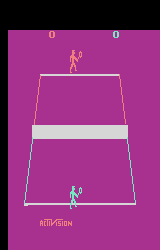

In [10]:
import PIL
PIL.Image.fromarray(Environment.render())

In [0]:
eval_env = tf_py_environment.TFPyEnvironment(Environment)

In [0]:
preprocessing_layer = tf.keras.layers.Lambda(lambda obs: tf.cast(obs, np.float32) /255.0)

In [0]:
conv_layer_params=[(32, (8,8), 4), (64, (4,4), 2), (64, (3,3), 1)]
fully_connected_layer_params=[512]

q_net = q_network.QNetwork(
    eval_env.observation_spec(),
    eval_env.action_spec(), 
    preprocessing_layers=preprocessing_layer, 
    conv_layer_params=conv_layer_params, 
    fc_layer_params=fully_connected_layer_params)

In [0]:
optimizer = tf.compat.v1.train.AdadeltaOptimizer(learning_rate=learning_rate)
train_step = tf.Variable(0)
update_period = 4
epsilon_fn = tf.keras.optimizers.schedules.PolynomialDecay(initial_learning_rate=1.0, decay_steps=(250000)//update_period, end_learning_rate=0.01)
agent = dqn_agent.DqnAgent(
    eval_env.time_step_spec(), 
    eval_env.action_spec(), 
    q_network=q_net, 
    optimizer=optimizer, 
    target_update_period=2000, 
    td_errors_loss_fn=common.element_wise_huber_loss, 
    gamma=0.99, 
    train_step_counter=train_step, 
    epsilon_greedy=lambda: epsilon_fn(train_step))

In [0]:
agent.initialize()

In [0]:
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=eval_env.batch_size,
    max_length = replay_buffer_max_length
    )
replay_buffer_observer = replay_buffer.add_batch

In [21]:
agent.collect_data_spec

Trajectory(step_type=TensorSpec(shape=(), dtype=tf.int32, name='step_type'), observation=BoundedTensorSpec(shape=(250, 160, 3), dtype=tf.uint8, name='observation', minimum=array(0, dtype=uint8), maximum=array(255, dtype=uint8)), action=BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0), maximum=array(17)), policy_info=(), next_step_type=TensorSpec(shape=(), dtype=tf.int32, name='step_type'), reward=TensorSpec(shape=(), dtype=tf.float32, name='reward'), discount=BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)))

In [22]:
agent.collect_data_spec._fields

('step_type',
 'observation',
 'action',
 'policy_info',
 'next_step_type',
 'reward',
 'discount')

In [30]:
train_metrics = [tf_metrics.NumberOfEpisodes(), tf_metrics.EnvironmentSteps(), tf_metrics.AverageReturnMetric(), tf_metrics.AverageEpisodeLengthMetric()]

def metric_log(metrics, pref=''):
  log = ['{0} {1}'.format(m.name, m.result().numpy()) for m in metrics]
  return '{0}\n\n{1}'.format(pref, '\n'.join(log))

print(metric_log(train_metrics))



NumberOfEpisodes 0
EnvironmentSteps 0
AverageReturn 0.0
AverageEpisodeLength 0.0


In [0]:
collect_driver = dynamic_step_driver.DynamicStepDriver(
    eval_env,
    agent.collect_policy,
    observers = [replay_buffer_observer] + train_metrics,
    num_steps=update_period
)

In [0]:
class ShowProgress:
  def __init__(self, total):
    self.counter = 0
    self.total = total
  def __call__(self, trajecotry):
    if not trajectory.is_boudary():
      self.counter += 1
    if self.counter %100 == 0:
      print("\r{0}/{1}".format(self.counter, self.total), end="")

In [0]:
initial_collect_policy = random_tf_policy.RandomTFPolicy(eval_env.time_step_spec(), eval_env.action_spec())

In [0]:
initial_driver = dynamic_step_driver.DynamicStepDriver(eval_env, initial_collect_policy, observers=[replay_buffer.add_batch, ShowProgress(20000)], num_steps=20000)

In [0]:
dataset = replay_buffer.as_dataset(
  num_parallel_calls = 3,
  sample_batch_size = batch_size,
  num_steps=2
).prefetch(3)

In [0]:
global_step = tf.compat.v1.train.get_global_step()

In [0]:
def train_agent(n_iterations, checkpointer):
  time_step = None
  policy_state = agent.collect_policy.get_initial_state(eval_env.batch_size)
  iterator = iter(dataset)
  for iteration in range(n_iterations):
    time_step, policy_state = collect_driver.run(time_step, policy_state)
    trajectory, buff_info = next(iterator)
    train_loss = agent.train(trajectory)
    print('\r{} loss:{:.5f}'.format(iteration, train_loss.loss.numpy()), end="")
    if iteration % log_interval == 0:
      print(metric_log(train_metrics))
    if iteration % 1000 == 0:
      checkpointer.save(global_step)
    

In [0]:
train_checkpointer = common.Checkpointer(
    ckpt_dir = '/content/drive/My Drive/Data/CHECKPOINT',
    max_to_keep = 1,
    agent = agent,
    policy = agent.policy,
    replay_buffer=replay_buffer
)

In [0]:
train_agent(training_iterations, train_checkpointer)

In [0]:
train_checkpointer.initialize_or_restore()

In [0]:
def embed_mp4(filename):
  video = open(filename, 'rb').read()
  b64 = base64.b64encode(video)
  tag='''
  <video width="640" height="480" controls>
  <source src="data:video/mp4;base64,{0}" type="video/mp4">
  </video> '''.format(b64.decode())

  return IPython.display.HTML(tag)

In [0]:
def create_policy_eval_video(policy, filename, num_episodes=5, fps=30):
  filename = filename+".mp4"
  with imageio.get_writer(filename, fps=fps) as video: 
    for _ in range(num_episodes):
      time_step = eval_env.reset()
      video.append_data(Environment.render())
      while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        video.append_data(Environment.render())
  
  return embed_mp4(filename)

In [60]:
create_policy_eval_video(agent.policy, "trained-agent")